In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

import streamlit as st
import os
import numpy as np

In [3]:
train_data_dir = 'train'
validation_data_dir = 'test'

In [4]:
image_size = (128, 128)  
batch_size = 32

In [5]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to the range [0, 1]
    shear_range=0.2,   # applies random shear transformations to the images. 
    zoom_range=0.2,    #applies random zoom transformations to the images. 
    horizontal_flip=True  #randomly flips the images horizontally.
)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'   
)

Found 4438 images belonging to 2 classes.


In [7]:
validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255)

In [8]:
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 1114 images belonging to 2 classes.


In [10]:
model = models.Sequential([ 
                                 
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
  
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
  
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 128)      

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history=model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20
139/139 [==============================] - 66s 472ms/step - loss: 0.6958 - accuracy: 0.5430 - val_loss: 0.6592 - val_accuracy: 0.5817
Epoch 2/20
139/139 [==============================] - 53s 381ms/step - loss: 0.6607 - accuracy: 0.6046 - val_loss: 0.6216 - val_accuracy: 0.6750
Epoch 3/20
139/139 [==============================] - 52s 374ms/step - loss: 0.6438 - accuracy: 0.6275 - val_loss: 0.6125 - val_accuracy: 0.6481
Epoch 4/20
139/139 [==============================] - 52s 375ms/step - loss: 0.6168 - accuracy: 0.6584 - val_loss: 0.5872 - val_accuracy: 0.6858
Epoch 5/20
139/139 [==============================] - 52s 374ms/step - loss: 0.5995 - accuracy: 0.6710 - val_loss: 0.5724 - val_accuracy: 0.6966
Epoch 6/20
139/139 [==============================] - 52s 375ms/step - loss: 0.5901 - accuracy: 0.6744 - val_loss: 0.5950 - val_accuracy: 0.6777
Epoch 7/20
139/139 [==============================] - 52s 376ms/step - loss: 0.5766 - accuracy: 0.6906 - val_loss: 0.5690 - val_ac

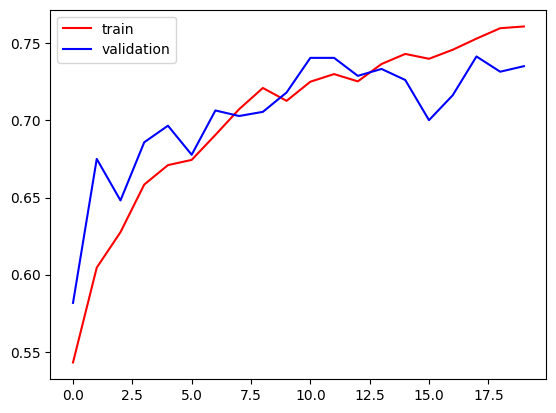

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

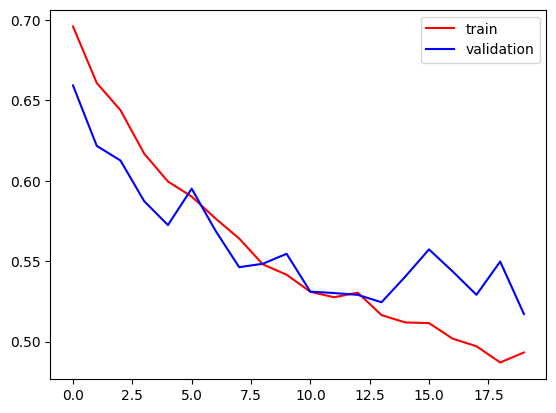

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [16]:
model.save('best_model.n')

INFO:tensorflow:Assets written to: best_model.n\assets


INFO:tensorflow:Assets written to: best_model.n\assets


1/1 [==============================] - 0s 91ms/step


array([[0.]], dtype=float32)

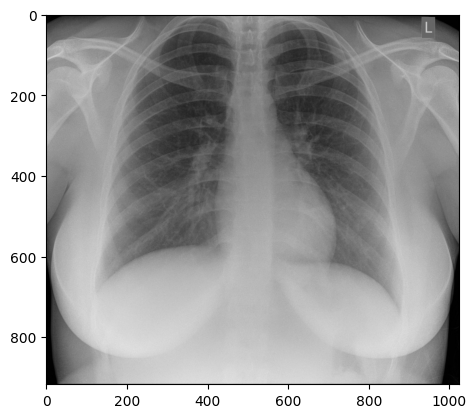

In [17]:
import cv2
test_img =cv2.imread('normalchest.jpeg')
plt.imshow(test_img,cmap=plt.get_cmap('gray'))
test_img =cv2.resize(test_img,(128,128))
test_img =test_img.reshape((1,128,128,3))
model.predict(test_img)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)

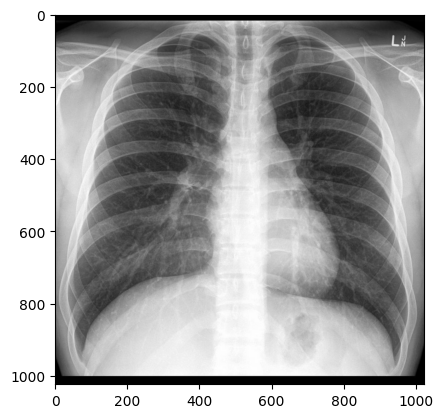

In [21]:
import cv2
test_img =cv2.imread('normal.jpg')
plt.imshow(test_img,cmap=plt.get_cmap('gray'))
test_img =cv2.resize(test_img,(128,128))
test_img =test_img.reshape((1,128,128,3))
model.predict(test_img)

1/1 [==============================] - 0s 40ms/step


array([[1.]], dtype=float32)

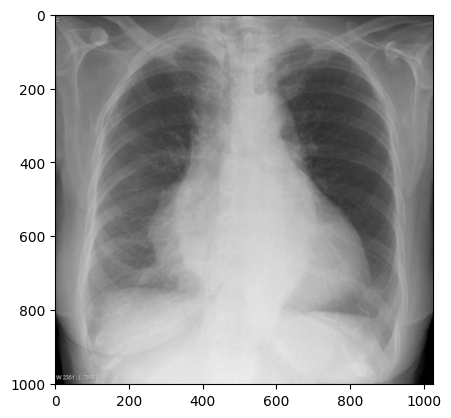

In [22]:
import cv2
test_img =cv2.imread('cardiomegaly.jpeg')
plt.imshow(test_img,cmap=plt.get_cmap('gray'))
test_img =cv2.resize(test_img,(128,128))
test_img =test_img.reshape((1,128,128,3))
model.predict(test_img)

1/1 [==============================] - 0s 21ms/step


array([[1.]], dtype=float32)

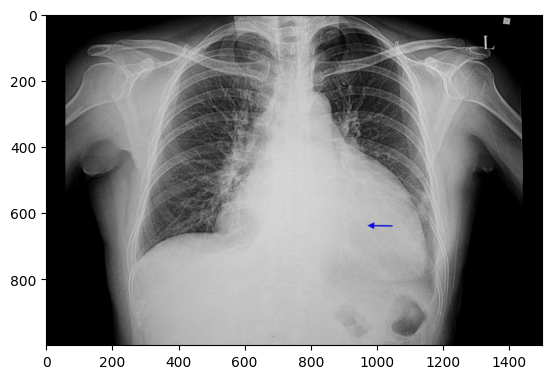

In [23]:
import cv2
test_img =cv2.imread('cardio_inlargeheart.jpg')
plt.imshow(test_img,cmap=plt.get_cmap('gray'))
test_img =cv2.resize(test_img,(128,128))
test_img =test_img.reshape((1,128,128,3))
model.predict(test_img)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

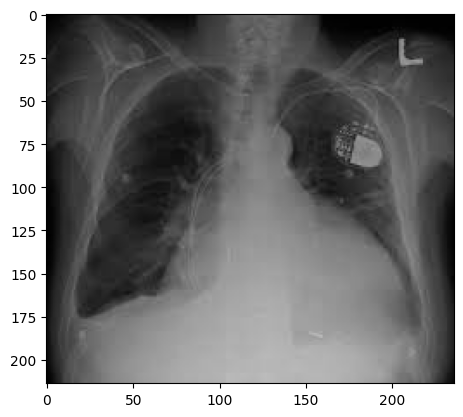

In [32]:
import cv2
test_img =cv2.imread('test1.jpg')
plt.imshow(test_img,cmap=plt.get_cmap('gray'))
test_img =cv2.resize(test_img,(128,128))
test_img =test_img.reshape((1,128,128,3))
model.predict(test_img)